In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_train = pd.read_excel('/content/drive/MyDrive/praktikum_ml/praktikum10/data/kelulusan_train.xls')
df_test = pd.read_excel('/content/drive/MyDrive/praktikum_ml/praktikum10/data/kelulusan_test.xls')

In [8]:
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [9]:
df_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [12]:
print(df_train['JENIS KELAMIN'].unique())
print(df_train['STATUS MAHASISWA'].unique())
print(df_train['STATUS NIKAH'].unique())
print(df_train['STATUS KELULUSAN'].unique())

['PEREMPUAN' 'LAKI - LAKI']
['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['TERLAMBAT' 'TEPAT']


In [14]:
df_train.drop(columns=['STATUS NIKAH'],inplace=True)
df_test.drop(columns=['STATUS NIKAH'],inplace=True)

In [16]:
replacement = {
    'JENIS KELAMIN': {'LAKI - LAKI': 1, 'PEREMPUAN': 0}, # Corrected 'LAKI - LAKI'
    'STATUS MAHASISWA': {'MAHASISWA': 0, 'BEKERJA': 1},
    'STATUS KELULUSAN': {'TERLAMBAT': 1, 'TEPAT': 0}
}

df_train = df_train.replace(replacement, inplace=False)
df_train.head()

/tmp/ipython-input-3787653003.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacement, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,DWI HESTYNA PRIHASTANTY,0,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,MURYA ARIEF BASUKI,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,NANIK SUSANTI,0,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,RIFKA ISTIQFARINA,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [17]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [18]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [19]:
df_train = df_train.dropna(subset=['IPS 8'])
df_train = df_train.dropna(subset=['IPK '])

In [20]:
df_test = df_test.dropna(subset=['IPS 8'])
df_test = df_test.dropna(subset=['IPK '])

In [21]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [22]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [23]:
df_train = df_train.drop(columns=['NAMA'])
df_train.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,28,2.76,2.8,3.2,3.17,2.98,3.0,3.03,0.0,3.07,1


In [24]:
df_test = df_test.drop(columns=['NAMA'])
df_test.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,LAKI - LAKI,MAHASISWA,24,3.17,2.7,3.23,2.41,3.0,2.47,1.75,0.0,2.75,TEPAT


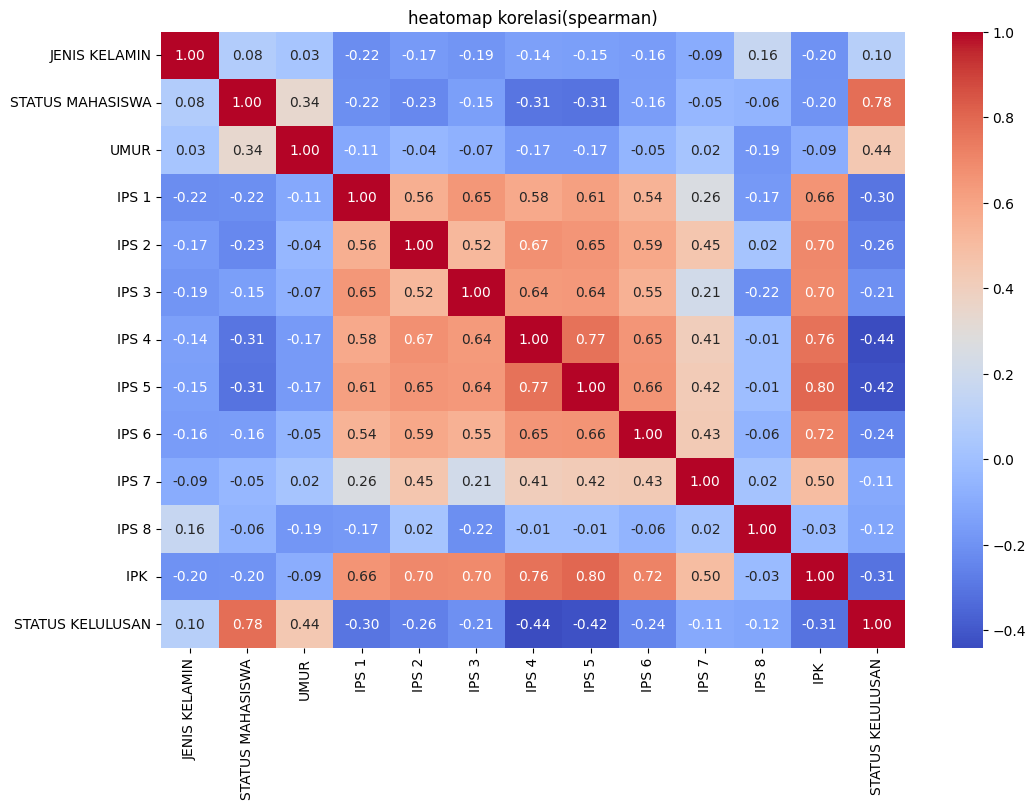

In [25]:
correlation_matrix = df_train.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",cbar=True)
plt.title("heatomap korelasi(spearman)")
plt.show()

/tmp/ipython-input-1371463919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df_train,palette='Set2')


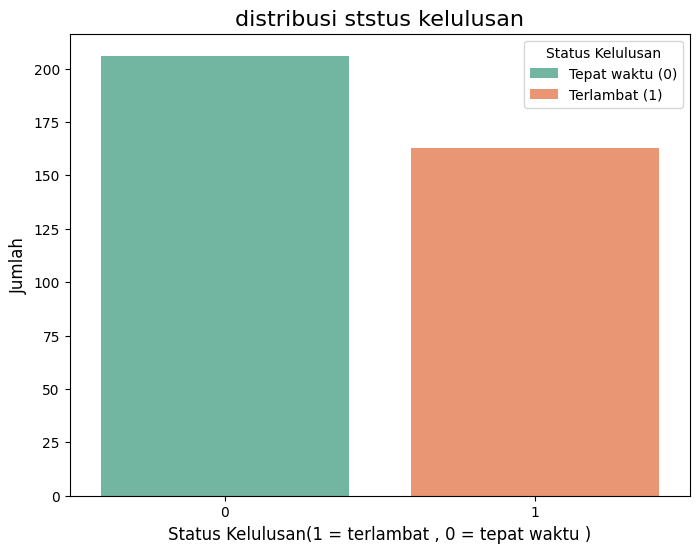

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS KELULUSAN', data=df_train,palette='Set2')

plt.title('distribusi ststus kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan(1 = terlambat , 0 = tepat waktu )', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.legend(title='Status Kelulusan', labels=['Tepat waktu (0)', 'Terlambat (1)'], loc='upper right')
plt.show()

In [32]:
X_train = df_train.drop(columns=['STATUS KELULUSAN'])
y_train = df_train['STATUS KELULUSAN']

X_test = df_test.drop(columns=['STATUS KELULUSAN'])
y_test = df_test['STATUS KELULUSAN']



In [35]:
X_train.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
0,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07
1,0,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17
2,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54
3,0,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41
4,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09


In [36]:
X_test.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
0,LAKI - LAKI,MAHASISWA,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75
2,LAKI - LAKI,MAHASISWA,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81
3,LAKI - LAKI,MAHASISWA,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82
4,PEREMPUAN,MAHASISWA,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09
5,LAKI - LAKI,MAHASISWA,24,3.10,2.98,3.17,3.25,3.41,3.08,3.43,3.00,3.23
